In [1]:
import nengo
from nengo.utils.matplotlib import rasterplot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nengo_learn_assoc_mem.learning_rules.fake_voja import FakeVoja
from nengo_learn_assoc_mem.learning_rules.neg_voja import NegVoja

In [2]:
def cycle_array(x, period, dt=0.001):
    """Cycles through the elements"""
    i_every = int(round(period / dt))
    if i_every != period / dt:
        raise ValueError("dt (%s) does not divide period (%s)" % (dt, period))

    def f(t):
        i = int(round((t - dt) / dt))  # t starts at dt
        return x[int(i / i_every) % len(x)]

    return f

In [18]:
dims = 2
n_neurons = 20
seed = 2
intercepts = [0.8]*n_neurons

rad_comp = 1/np.sqrt(2)

In [32]:
with nengo.Network() as model:
    ens = nengo.Ensemble(n_neurons, dims, intercepts=intercepts, seed=seed)

with nengo.Simulator(model) as sim:
    pass

enc = sim.data[ens].encoders
fake_voja = FakeVoja(enc, learning_rate=-1e-3)

Building finished in 0:00:01.                                                   


In [33]:
with nengo.Network() as model:
    in_nd = nengo.Node(cycle_array([[-rad_comp, -rad_comp], [rad_comp, rad_comp]], 0.1))

    voja_nd = nengo.Node(fake_voja.encode, size_in=dims+n_neurons)
    ens = nengo.Ensemble(n_neurons, dims, intercepts=intercepts, seed=seed)

    nengo.Connection(in_nd, voja_nd[:dims], synapse=None)
    nengo.Connection(ens.neurons, voja_nd[dims:], synapse=0)
    nengo.Connection(voja_nd, ens.neurons, synapse=None)

    p_in = nengo.Probe(in_nd)
    p_spikes = nengo.Probe(ens.neurons)

with nengo.Simulator(model) as sim:
    sim.run(1)

Building finished in 0:00:01.                                                   
Simulating finished in 0:00:01.                                                 


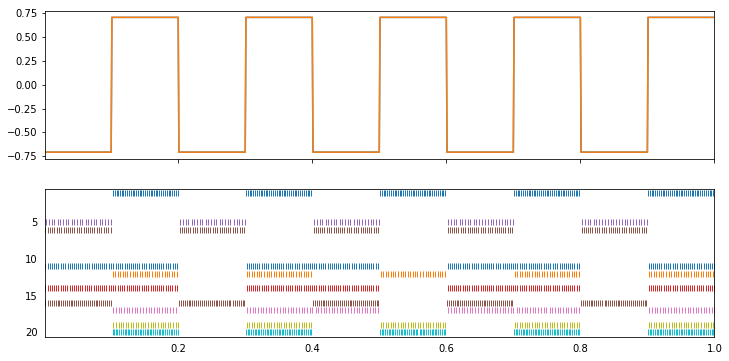

In [34]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
ax1.plot(sim.trange(), sim.data[p_in])
rasterplot(sim.trange(), sim.data[p_spikes], ax=ax2)

In [35]:
x_val = np.linspace(0, 2*np.pi, 50)
circ = np.array([np.cos(x_val), np.sin(x_val)]).T

enc_h = fake_voja.encoder_hist

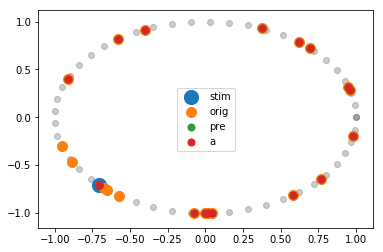

In [36]:
win_pre = 10
win_a = 100

plt.scatter(circ[:, 0], circ[:, 1], color='k', alpha=0.2)
plt.scatter(sim.data[p_in][win_pre][0], sim.data[p_in][win_pre][1], label="stim", s=200)

plt.scatter(enc_h[0][:, 0], enc_h[0][:, 1], label="orig", s=100)
plt.scatter(enc_h[win_pre][:, 0], enc_h[win_pre][:, 1], label="pre", s=50)
plt.scatter(enc_h[win_a][:, 0], enc_h[win_a][:, 1], label="a", s=50)

plt.legend()
# plt.xlim(-1.1, 1.1)
# plt.ylim(-1.1, 1.1)

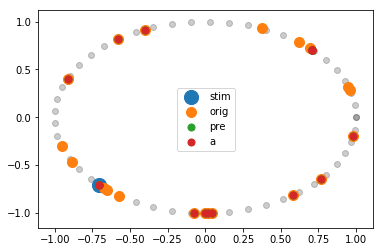

In [37]:
win_pre = 210
win_a = 300

plt.scatter(circ[:, 0], circ[:, 1], color='k', alpha=0.2)
plt.scatter(sim.data[p_in][win_pre][0], sim.data[p_in][win_pre][1], label="stim", s=200)

plt.scatter(enc_h[0][:, 0], enc_h[0][:, 1], label="orig", s=100)
plt.scatter(enc_h[win_pre][:, 0], enc_h[win_pre][:, 1], label="pre", s=50)
plt.scatter(enc_h[win_a][:, 0], enc_h[win_a][:, 1], label="a", s=50)

plt.legend()
# plt.xlim(-1.1, 1.1)
# plt.ylim(-1.1, 1.1)

In [ ]:
win_pre = 310
win_b = 400

plt.scatter(circ[:, 0], circ[:, 1], color='k', alpha=0.2)
plt.scatter(sim.data[p_in][win_pre][0], sim.data[p_in][win_pre][1], label="stim", s=200)

plt.scatter(enc_h[0][:, 0], enc_h[0][:, 1], label="orig", s=100)
plt.scatter(enc_h[win_pre][:, 0], enc_h[win_pre][:, 1], label="pre", s=50)
plt.scatter(enc_h[win_b][:, 0], enc_h[win_b][:, 1], label="b", s=50)

plt.legend()

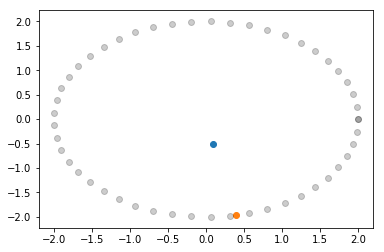

In [26]:
rad = 2
orig = np.array([0.1, -0.5])
mag = np.linalg.norm(orig)
mod = rad / mag * orig

x_val = np.linspace(0, 2*np.pi, 50)
base_circ = np.array([rad*np.cos(x_val), rad*np.sin(x_val)]).T

plt.scatter(orig[0], orig[1])
plt.scatter(mod[0], mod[1])
plt.scatter(base_circ[:, 0], base_circ[:, 1], color='k', alpha=0.2)